###First, we'll need to import the necessary tools:

In [0]:
import nltk
nltk.download('book', quiet=True)
import json
from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords, words
from nltk import sent_tokenize
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
% matplotlib inline
import pylab


###Next, we need to bring in the .json file containing the tweets collected. This would normally be a significantly higher number of tweets, but within the constraints of this project, it is relatively small.

In [2]:
file = [json.loads(l) for l in open('tweets_history.json', 'rb')]
len(file)

FileNotFoundError: ignored

###Next we separate the tweets by the subject selected for comparison.

In [0]:
tomi_tweets = [t for t in file if t['user']['screen_name'] == 'TomiLahren']
sean_tweets = [t for t in file if t['user']['screen_name'] == 'seanhannity']
ande_tweets = [t for t in file if t['user']['screen_name'] == 'andersoncooper']
rach_tweets = [t for t in file if t['user']['screen_name'] == 'maddow']
print('Tomi Lahren; Full Tweets Files:', tomi_tweets[0])

Tomi Lahren; Full Tweets Files: {'contributors': None, 'truncated': False, 'is_quote_status': False, 'in_reply_to_status_id': None, 'id': 1072617831647334400, 'favorite_count': 3317, 'full_text': 'Trump wants to build the wall to protect Americans and American interests. Democrats want open borders to protect illegals and illegal interests. See the difference? #BuildThatWall', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'retweeted': False, 'coordinates': None, 'entities': {'symbols': [], 'user_mentions': [], 'hashtags': [{'indices': [166, 180], 'text': 'BuildThatWall'}], 'urls': []}, 'in_reply_to_screen_name': None, 'in_reply_to_user_id': None, 'display_text_range': [0, 180], 'retweet_count': 1043, 'id_str': '1072617831647334400', 'favorited': False, 'user': {'follow_request_sent': False, 'has_extended_profile': True, 'profile_use_background_image': True, 'default_profile_image': False, 'id': 468646961, 'profile_background_image_url_h

###Then extract the text of the tweet from each tweet dictionary. We could likewise extract the non-text information like time and location for further analysis, but we won't use it here.

In [0]:
tomi_text = [tweet['full_text'] for tweet in tomi_tweets]
sean_text = [tweet['full_text'] for tweet in sean_tweets]
ande_text = [tweet['full_text'] for tweet in ande_tweets]
rach_text = [tweet['full_text'] for tweet in rach_tweets]
print('Sean Hannity; Tweet Text Only:', sean_text)

Sean Hannity; Tweet Text Only: ['https://t.co/ou3jp9pEw2', "THE LATEST: Suspect identified by authorities, was on 'Terror Watch List,' remains on the run... https://t.co/9sGzzYOr9a", '*Update* https://t.co/VR48np4NJL', "Sean Hannity: Democrats' real post-midterm agenda unfolds\n\nhttps://t.co/AEkeNwD5Na", 'Developing... https://t.co/cQtGTRE7fF', 'https://t.co/l9cvJOkkRW', 'The Latest https://t.co/RvLFuaEIUz', 'latest from @dbongino https://t.co/sOcAsxxJrb', 'https://t.co/PlUIFFCB9n', 'https://t.co/KydAe9HxqX', 'https://t.co/chkTBJHShc', 'One more time? https://t.co/Sq3QiWIRfU', 'Facebook Fires Exec for Pro Trump Beliefs: Report https://t.co/yNq18DR0sJ', 'THANK YOU! https://t.co/je4wzwIgSY', '**ELECTION UPDATE** https://t.co/Oj5vOPFynp', 'https://t.co/vWiQyHFxhZ', 'https://t.co/PrE0H0355l', 'https://t.co/1PjNmyDjDA', 'MUST SEE: AZ Veterans Memorial Syncs Perfectly with the Sun at 11:11 on 11/11 https://t.co/75fn18UHqE', 'https://t.co/AtlzM5jJN4', 'https://t.co/Oz6KrYhtHE']


###Now we're going to convert the list object of strings to streamline the normalization and tokenization process. We might keep this separate or segment it by something like time or location if that were pertinent to the study.

In [0]:
tomi_string = ' ' .join(tomi_text)
sean_string = ' ' .join(sean_text)
ande_string = ' ' .join(ande_text)
rach_string = ' ' .join(rach_text)
print('Anderson Cooper; Tweet Text String:', ande_string[:100])

Anderson Cooper; Tweet Text String: Hey there! If you're a fan of @AC360 and want to visit the set with 3 friends and say hi -- bid on t


###For word-level analysis, we will normalize and clear out non-lexical content.

In [0]:
tokenizer = TweetTokenizer()
tomi_corpus = [w.lower() for w in tokenizer.tokenize(tomi_string) if w.isalpha()]
sean_corpus = [w.lower() for w in tokenizer.tokenize(sean_string) if w.isalpha()]
ande_corpus = [w.lower() for w in tokenizer.tokenize(ande_string) if w.isalpha()]
rach_corpus = [w.lower() for w in tokenizer.tokenize(rach_string) if w.isalpha()]
print('Rachel Maddow; Wordlist:', rach_corpus[:10])

Rachel Maddow; Wordlist: ['but', 'his', 'seeming', 'imperviousness', 'to', 'such', 'material', 'often', 'renders', 'all']


###We can further filter these for the purposes of focusing on content words by removing the stop words from them.

In [0]:
stop_words = set(w for w in stopwords.words('english'))
tomi_corpus_filtered = [w for w in tomi_corpus if w not in stop_words]
sean_corpus_filtered = [w for w in sean_corpus if w not in stop_words]
ande_corpus_filtered = [w for w in ande_corpus if w not in stop_words]
rach_corpus_filtered = [w for w in rach_corpus if w not in stop_words]
print('Tomi Lahren; Filtered Wordlist:', tomi_corpus_filtered)

Tomi Lahren; Filtered Wordlist: ['trump', 'wants', 'build', 'wall', 'protect', 'americans', 'american', 'interests', 'democrats', 'want', 'open', 'borders', 'protect', 'illegals', 'illegal', 'interests', 'see', 'difference', 'lovely', 'democrats', 'want', 'spend', 'money', 'building', 'wall', 'problem', 'spending', 'money', 'money', 'people', 'legal', 'right', 'truly', 'amazing', 'june', 'coming', 'strong', 'enough', 'allow', 'almost', 'million', 'stay', 'illegally', 'another', 'month', 'crybabies', 'hey', 'smart', 'one', 'check', 'census', 'supplemental', 'poverty', 'measure', 'look', 'search', 'engine', 'choice', 'oh', 'ca', 'state', 'highest', 'personal', 'income', 'tax', 'rate', 'also', 'highest', 'poverty', 'rate', 'answer', 'pretty', 'simple', 'run', 'ground', 'democrats', 'never', 'met', 'tax', 'like', 'guess', 'never', 'know', 'since', 'hillary', 'never', 'president', 'bummer', 'gonna', 'come', 'mandated', 'new', 'oscar', 'host', 'liberal', 'gay', 'black', 'female', 'muslim', '

###We can now look at a frequency distribution of each subjects word usage.

In [0]:
tomi_freqdist = nltk.FreqDist(tomi_corpus_filtered)
sean_freqdist = nltk.FreqDist(sean_corpus_filtered)
ande_freqdist = nltk.FreqDist(ande_corpus_filtered)
rach_freqdist = nltk.FreqDist(rach_corpus_filtered)
print('Sean Hannity; Filtered Word Frequency Distribution:', sean_freqdist.most_common(20))

Sean Hannity; Filtered Word Frequency Distribution: [('latest', 3), ('update', 2), ('suspect', 1), ('identified', 1), ('authorities', 1), ('terror', 1), ('watch', 1), ('list', 1), ('remains', 1), ('run', 1), ('sean', 1), ('hannity', 1), ('democrats', 1), ('real', 1), ('agenda', 1), ('unfolds', 1), ('developing', 1), ('one', 1), ('time', 1), ('facebook', 1)]


###These frequencies can be plotted for a visual representation of content word usage.

Tomi Lahren; Top 25


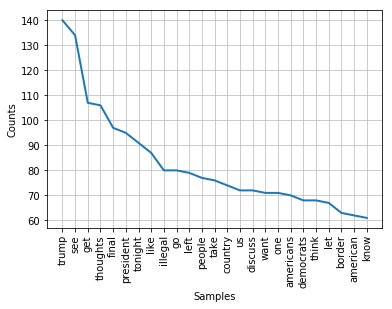

None
Sean Hannity; Top 25


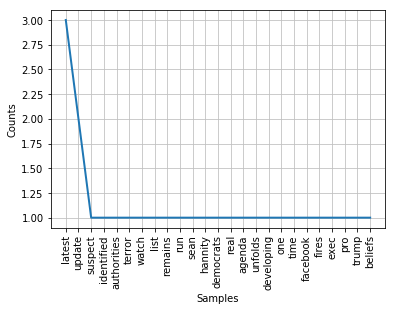

None
Anderson Cooper; Top 25


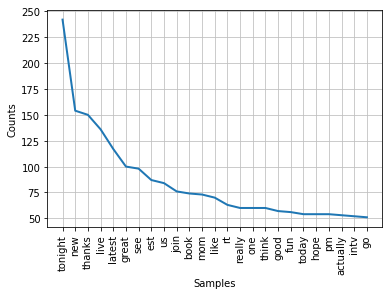

None
Rachel Maddow; Top 25


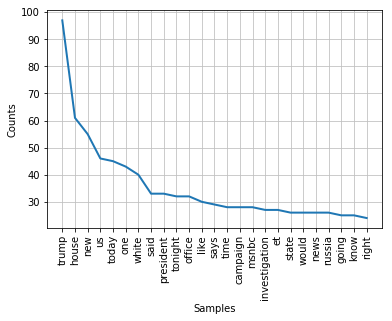

None


In [0]:
print('Tomi Lahren; Top 25')
print(tomi_freqdist.plot(25))
print('Sean Hannity; Top 25')
print(sean_freqdist.plot(25))
print('Anderson Cooper; Top 25')
print(ande_freqdist.plot(25))
print('Rachel Maddow; Top 25')
print(rach_freqdist.plot(25))

###We can repeat this process by combining subjects by a categorical marker such as liberal/conservative or male/female. Or we can simply look at them all together. The quantity of tweets varies greatly from subject to subject so we'll divide the word frequencies to get a proportion relative to the subjects usage.

In [0]:
con = tomi_corpus_filtered + sean_corpus_filtered
con_freqdist = nltk.FreqDist(con)

lib = ande_corpus_filtered + rach_corpus_filtered
lib_freqdist = nltk.FreqDist(lib)

fem = tomi_corpus_filtered + rach_corpus_filtered
fem_freqdist = nltk.FreqDist(fem)

mal = ande_corpus_filtered + sean_corpus_filtered
mal_freqdist = nltk.FreqDist(mal)

tot = con + lib
tot_freqdist = nltk.FreqDist(tot)

print('All', tot_freqdist.most_common(10))
print('Conservative', con_freqdist.most_common(10))
print('Liberal', lib_freqdist.most_common(10))
print('Female', fem_freqdist.most_common(10))
print('Male', mal_freqdist.most_common(10))

All [('tonight', 365), ('new', 262), ('see', 253), ('trump', 241), ('us', 202), ('thanks', 193), ('like', 187), ('one', 175), ('live', 174), ('get', 169)]
Conservative [('trump', 141), ('see', 135), ('get', 107), ('thoughts', 106), ('final', 97), ('president', 95), ('tonight', 91), ('like', 87), ('illegal', 80), ('go', 80)]
Liberal [('tonight', 274), ('new', 209), ('thanks', 164), ('live', 140), ('us', 130), ('great', 122), ('latest', 119), ('see', 118), ('one', 103), ('like', 100)]
Female [('trump', 237), ('see', 154), ('president', 128), ('get', 125), ('tonight', 123), ('us', 118), ('like', 117), ('one', 114), ('new', 108), ('thoughts', 106)]
Male [('tonight', 242), ('new', 154), ('thanks', 150), ('live', 136), ('latest', 120), ('great', 100), ('see', 99), ('est', 87), ('us', 84), ('join', 76)]


###And visualize them:

Conservative; Top 25


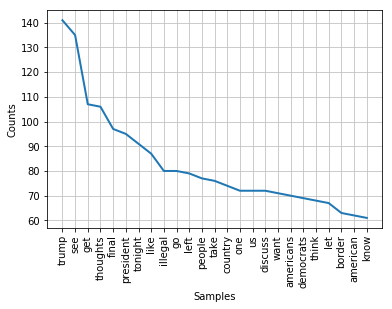

None
Liberal; Top 25


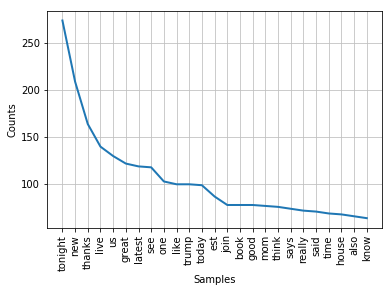

None
Female; Top 25


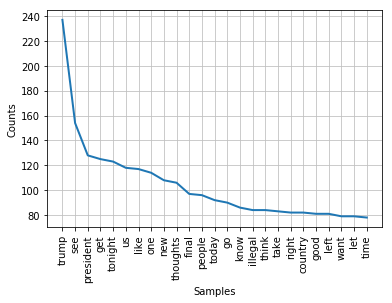

None
Male; Top 25


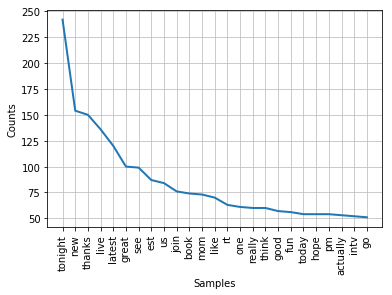

None
All; Top 25


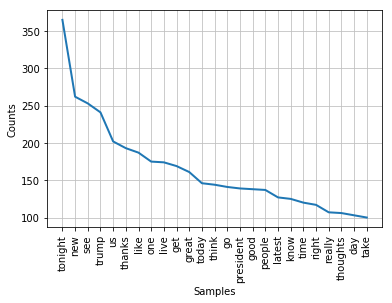

None


In [0]:
print('Conservative; Top 25')
print(con_freqdist.plot(25))

print('Liberal; Top 25')
print(lib_freqdist.plot(25))

print('Female; Top 25')
print(fem_freqdist.plot(25))

print('Male; Top 25')
print(mal_freqdist.plot(25))

print('All; Top 25')
print(tot_freqdist.plot(25))

###Now, let's look at some relative word usage statistics. We'll start by looking at how often conservatives versus liberals used some key words: 'Trump", "president", "illegal", and "American".

In [0]:
print('Trump')
con_trump = con_freqdist['trump']/tot_freqdist['trump']
lib_trump = lib_freqdist['trump']/tot_freqdist['trump']
print('Conservative:', con_trump, 'Liberal:', lib_trump)

print('president')
con_pres = con_freqdist['president']/tot_freqdist['president']
lib_pres = lib_freqdist['president']/tot_freqdist['president']
print('Conservative:', con_pres, 'Liberal:', lib_pres)

print('illegal')
con_ill =  con_freqdist['illegal']/tot_freqdist['illegal']
lib_ill = lib_freqdist['illegal']/tot_freqdist['illegal']
print('Conservative:', con_ill, 'Liberal:', lib_ill)

print('American')
con_am = con_freqdist['american']/tot_freqdist['american']
lib_am = lib_freqdist['american']/tot_freqdist['american']
print('Conservative:', con_am, 'Liberal:', lib_am)

Trump
Conservative: 0.5850622406639004 Liberal: 0.4149377593360996
president
Conservative: 0.6834532374100719 Liberal: 0.31654676258992803
illegal
Conservative: 0.9411764705882353 Liberal: 0.058823529411764705
American
Conservative: 0.7469879518072289 Liberal: 0.25301204819277107


###Now, how females versus males used the same words.

In [0]:
print('Trump')
mal_trump = mal_freqdist['trump']/tot_freqdist['trump']
fem_trump = fem_freqdist['trump']/tot_freqdist['trump']
print('Male:', mal_trump, 'Female:', fem_trump)

print('president')
mal_pres = mal_freqdist['president']/tot_freqdist['president']
fem_pres = fem_freqdist['president']/tot_freqdist['president']
print('Male:', mal_pres, 'Female:', fem_pres)
      
print('illegal')
mal_ill = mal_freqdist['illegal']/tot_freqdist['illegal']
fem_ill = fem_freqdist['illegal']/tot_freqdist['illegal']
print('Male:', mal_ill, 'Female:', fem_ill)

print('American')
mal_am = mal_freqdist['american']/tot_freqdist['american']
fem_am = fem_freqdist['american']/tot_freqdist['american']
print('Male:', mal_am, 'Female:', fem_am)

Trump
Male: 0.016597510373443983 Female: 0.983402489626556
president
Male: 0.07913669064748201 Female: 0.920863309352518
illegal
Male: 0.011764705882352941 Female: 0.9882352941176471
American
Male: 0.10843373493975904 Female: 0.891566265060241


###Now, let's look at the proportional usage of the words by political affiliation on a graph:

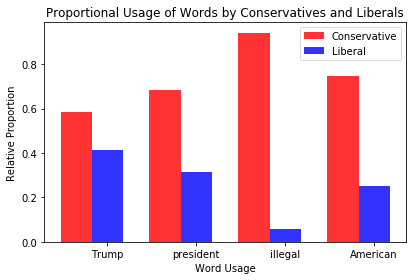

In [0]:
n_groups = 4
con_use = (con_trump, con_pres, con_ill, con_am)
lib_use = (lib_trump, lib_pres, lib_ill, lib_am)
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, con_use, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Conservative')
 
rects2 = plt.bar(index + bar_width, lib_use, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Liberal')
 
plt.xlabel('Word Usage')
plt.ylabel('Relative Proportion')
plt.title('Proportional Usage of Words by Conservatives and Liberals')
plt.xticks(index + bar_width, ('Trump', 'president', 'illegal', 'American'))
plt.legend()
 
plt.tight_layout()
plt.show()

###And do the same for the proportional usage by gender:

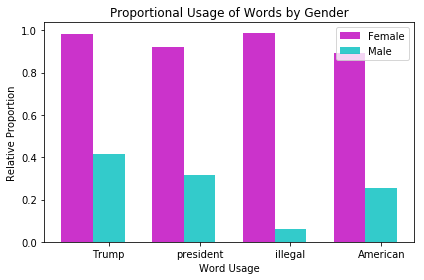

In [0]:
n_groups = 4
fem_use = (fem_trump, fem_pres, fem_ill, fem_am)
mal_use = (mal_trump, mal_pres, mal_ill, mal_am)
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, fem_use, bar_width,
                 alpha=opacity,
                 color='m',
                 label='Female')
 
rects2 = plt.bar(index + bar_width, lib_use, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Male')
 
plt.xlabel('Word Usage')
plt.ylabel('Relative Proportion')
plt.title('Proportional Usage of Words by Gender')
plt.xticks(index + bar_width, ('Trump', 'president', 'illegal', 'American'))
plt.legend()
 
plt.tight_layout()
plt.show()

###We can also tag the words with their part of speech. 

In [0]:
tomi_tagged = nltk.pos_tag(tomi_corpus_filtered)
sean_tagged = nltk.pos_tag(sean_corpus_filtered)
ande_tagged = nltk.pos_tag(ande_corpus_filtered)
rach_tagged = nltk.pos_tag(rach_corpus_filtered)
ande_tagged[:10]

[('hey', 'NN'),
 ('fan', 'NN'),
 ('want', 'VBP'),
 ('visit', 'NN'),
 ('set', 'VBN'),
 ('friends', 'NNS'),
 ('say', 'VBP'),
 ('hi', 'JJ'),
 ('bid', 'NN'),
 ('auction', 'NN')]

###Now we can run a frequency distribution, finding the most common parts of speech used by subject.

In [0]:
tomi_pos = [pos for w, pos in tomi_tagged]
tomi_pos_freqdist = nltk.FreqDist(tomi_pos)                        

sean_pos = [pos for w, pos in sean_tagged]
sean_pos_freqdist = nltk.FreqDist(sean_pos)

ande_pos = [pos for w, pos in ande_tagged]
ande_pos_freqdist = nltk.FreqDist(ande_pos)

rach_pos = [pos for w, pos in rach_tagged]
rach_pos_freqdist = nltk.FreqDist(rach_pos)
rach_pos_freqdist.most_common(5)

[('NN', 3473), ('JJ', 1677), ('NNS', 797), ('RB', 477), ('VBD', 454)]

###And look at the proportion use of parts of speech:


In [0]:
tomi_pos = [key for key, value in tomi_pos_freqdist.most_common(5)]
tomi_pos_prop = [value/len(tomi_corpus) for key, value in tomi_pos_freqdist.most_common(5)]

sean_pos = [key for key, value in sean_pos_freqdist.most_common(5)]
sean_pos_prop = [value/len(sean_corpus) for key, value in sean_pos_freqdist.most_common(5)]

ande_pos = [key for key, value in ande_pos_freqdist.most_common(5)]
ande_pos_prop = [value/len(ande_corpus) for key, value in ande_pos_freqdist.most_common(5)]

rach_pos = [key for key, value in rach_pos_freqdist.most_common(5)]
rach_pos_prop = [value/len(rach_corpus) for key, value in rach_pos_freqdist.most_common(5)]
print(tomi_pos)
print(tomi_pos_prop)

['NN', 'JJ', 'NNS', 'VBP', 'RB']
[0.17493897477624085, 0.10605870939475497, 0.06528134192902298, 0.042279526819803466, 0.026600738561682418]


###And graph them:

Tomi Lahren; Top 5


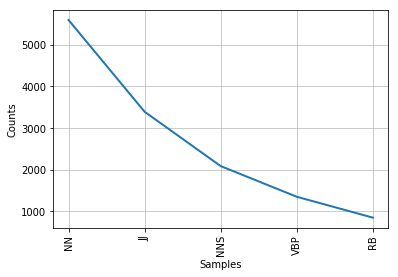

None
Sean Hanity; Top 5


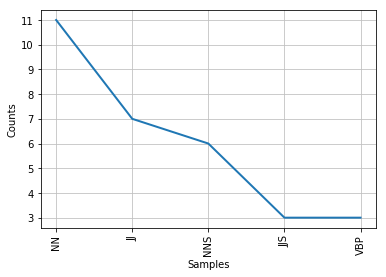

None
Anderson Cooper; Top 5


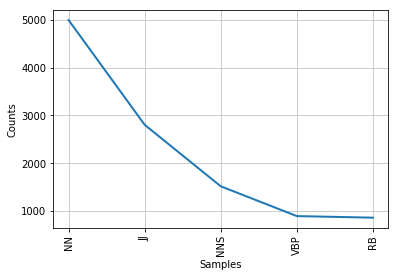

None
Rachel Maddow; Top 5


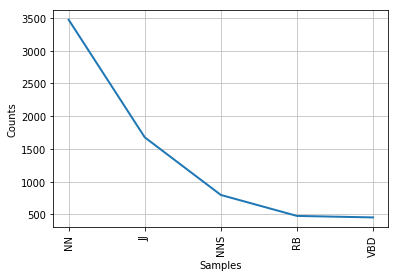

None


In [0]:
print('Tomi Lahren; Top 5')
print(tomi_pos_freqdist.plot(5))
      
print('Sean Hanity; Top 5')
print(sean_pos_freqdist.plot(5))
      
print('Anderson Cooper; Top 5')
print(ande_pos_freqdist.plot(5))     
      
print('Rachel Maddow; Top 5')
print(rach_pos_freqdist.plot(5))

###And look at their use of nouns, verbs, adjectives, and adverbs compared to each other.

In [0]:
tomi_relpos_prop = [tomi_pos_freqdist['NN']/len(tomi_corpus), tomi_pos_freqdist['VB']/len(tomi_corpus), tomi_pos_freqdist['JJ']/len(tomi_corpus), tomi_pos_freqdist['RB']/len(tomi_corpus)]
sean_relpos_prop = [sean_pos_freqdist['NN']/len(sean_corpus), sean_pos_freqdist['VB']/len(sean_corpus), sean_pos_freqdist['JJ']/len(sean_corpus), sean_pos_freqdist['RB']/len(sean_corpus)]
ande_relpos_prop = [ande_pos_freqdist['NN']/len(ande_corpus), ande_pos_freqdist['VB']/len(ande_corpus), ande_pos_freqdist['JJ']/len(ande_corpus), ande_pos_freqdist['RB']/len(ande_corpus)]
rach_relpos_prop = [rach_pos_freqdist['NN']/len(rach_corpus), rach_pos_freqdist['VB']/len(rach_corpus), rach_pos_freqdist['JJ']/len(rach_corpus), rach_pos_freqdist['RB']/len(rach_corpus)]
tomi_relpos_prop

[0.17493897477624085,
 0.019903611441447082,
 0.10605870939475497,
 0.026600738561682418]

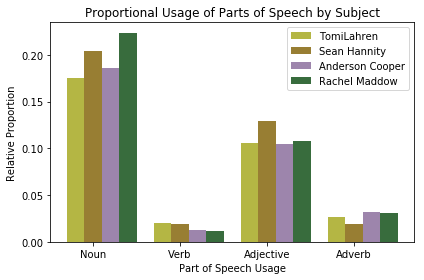

In [0]:
n_groups = 4
tomi_use = (tomi_relpos_prop)
sean_use = (sean_relpos_prop)
ande_use = (ande_relpos_prop)
rach_use = (rach_relpos_prop)
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, tomi_use, bar_width,
                 alpha=opacity,
                 color='xkcd:vomit',
                 label='TomiLahren')
 
rects2 = plt.bar(index + bar_width, sean_use, bar_width,
                 alpha=opacity,
                 color='xkcd:poop',
                 label='Sean Hannity')

rects3 = plt.bar(index + bar_width + bar_width, ande_use, bar_width,
                 alpha=opacity,
                 color='xkcd:dark lavender',
                 label='Anderson Cooper')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, rach_use, bar_width,
                 alpha=opacity,
                 color='xkcd:forest green',
                 label='Rachel Maddow')
 
plt.xlabel('Part of Speech Usage')
plt.ylabel('Relative Proportion')
plt.title('Proportional Usage of Parts of Speech by Subject')
plt.xticks(index + bar_width, ('Noun', 'Verb', 'Adjective', 'Adverb'))
plt.legend()
 
plt.tight_layout()
plt.show()

###If we wanted to perform a wider scope of analysis on the subject's tweets, we can tokenize sentences instead of words.

In [0]:
tomi_sents = sent_tokenize(tomi_string)
sean_sents = sent_tokenize(sean_string)
ande_sents = sent_tokenize(ande_string)
rach_sents = sent_tokenize(rach_string)
ande_sents[:2]

['Hey there!',
 "If you're a fan of @AC360 and want to visit the set with 3 friends and say hi -- bid on this @HomesForOurTrps #VeteransDay @eBay auction to help buy specially-designed, mortgage-free homes for wounded warriors!"]

###And, just for fun, we can even calculate a Dale-Chall Readability Score for our subjects.

In [0]:
!wget -q http://countwordsworth.com/download/DaleChallEasyWordList.txt

easy = set(w.strip() for w in open('DaleChallEasyWordList.txt'))

def dcscore(text):
    
  all_words = [w for w in text if w.isalpha()]
  diff_words = [w for w in all_words if w not in easy]
  sents = sent_tokenize(text)
  
  num_all = len(all_words)
  num_diff = len(diff_words)
  num_sents = len(sents)
  print('Words:', num_all, 'Difficult Words:', num_diff, 'Sentences', num_sents)
  
  dcinitial =  0.1579*(num_diff/num_all) + .0496*(num_all/num_sents)
  diff_ratio = num_diff/num_all
   
  if (diff_ratio > .05):
    Score= dcinitial + 3.6365
  else:
    Score = dcinitial
  print('DC Score:',Score)

In [0]:
print('Tomi Lahren')
print(dcscore(tomi_string))
print('Sean Hannity')
print(dcscore(sean_string))
print('Anderson Cooper')
print(dcscore(ande_string))
print('Rachel Maddow')
print(dcscore(rach_string))


Tomi Lahren
Words: 177110 Difficult Words: 164292 Sentences 3446
DC Score: 6.33220502088327
None
Sean Hannity
Words: 638 Difficult Words: 613 Sentences 3
DC Score: 14.336479362591431
None
Anderson Cooper
Words: 152073 Difficult Words: 139270 Sentences 2586
DC Score: 6.697897145118804
None
Rachel Maddow
Words: 94204 Difficult Words: 87853 Sentences 983
DC Score: 8.537079697385597
None
